In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/kaggle/input/laptop-price-dataset/laptop_data.csv')

In [3]:
data.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [4]:
data.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [5]:
data.info

<bound method DataFrame.info of       Unnamed: 0 Company            TypeName  Inches  \
0              0   Apple           Ultrabook    13.3   
1              1   Apple           Ultrabook    13.3   
2              2      HP            Notebook    15.6   
3              3   Apple           Ultrabook    15.4   
4              4   Apple           Ultrabook    13.3   
...          ...     ...                 ...     ...   
1298        1298  Lenovo  2 in 1 Convertible    14.0   
1299        1299  Lenovo  2 in 1 Convertible    13.3   
1300        1300  Lenovo            Notebook    14.0   
1301        1301      HP            Notebook    15.6   
1302        1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Disp

In [6]:
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
data['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [8]:
data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [9]:
data['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [10]:
print(data.shape)

(1303, 12)


In [11]:
data = data.drop_duplicates()
data1 = data.drop(["Unnamed: 0" ], axis=1)


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['Company'] = le.fit_transform(data1['Company'])
print(data1['Company'].head())

0    1
1    1
2    7
3    1
4    1
Name: Company, dtype: int64


In [13]:
data1["Ram"]=data1["Ram"].str.replace("GB","")
data1["Weight"]=data1["Weight"].str.replace("kg","")
data1["Ram"]=data1["Ram"].astype("int")
data1["Weight"]=data1["Weight"].astype("float")


In [14]:
data1['Memory'] = data1['Memory'].str.replace(r'[^\d.]', '', regex=True)
data1['Memory'] = data1['Memory'].astype(float)

In [15]:
data1['Cpu'] = le.fit_transform(data1['Cpu'])
data1['ScreenResolution'] = le.fit_transform(data1['ScreenResolution'])
data1['TypeName'] = le.fit_transform(data1['TypeName'])
data1['OpSys'] = le.fit_transform(data['OpSys'])
data1['Gpu'] = le.fit_transform(data['Gpu'])

In [16]:
data1.info

<bound method DataFrame.info of       Company  TypeName  Inches  ScreenResolution  Cpu  Ram  Memory  Gpu  \
0           1         4    13.3                23   65    8   128.0   58   
1           1         4    13.3                 1   63    8   128.0   51   
2           7         3    15.6                 8   74    8   256.0   53   
3           1         4    15.4                25   85   16   512.0    9   
4           1         4    13.3                23   67    8   256.0   59   
...       ...       ...     ...               ...  ...  ...     ...  ...   
1298       10         0    14.0                13   89    4   128.0   47   
1299       10         0    13.3                19   89   16   512.0   47   
1300       10         3    14.0                 0   34    2    64.0   40   
1301        7         3    15.6                 0   89    6     1.0   21   
1302        2         3    15.6                 0   34    4   500.0   40   

      OpSys  Weight        Price  
0         8    1.37 

In [17]:
print(data1.isna().sum())

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


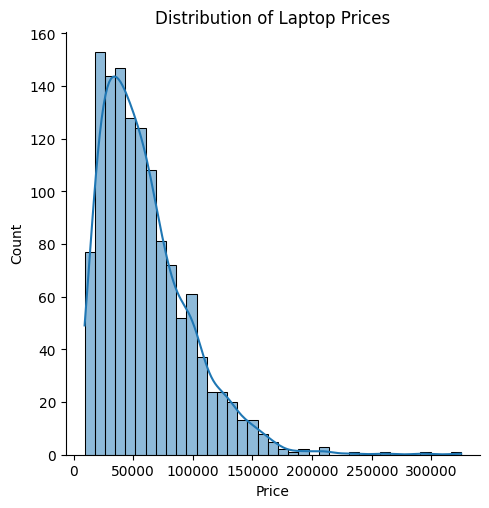

In [18]:
sns.displot(data1["Price"], kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


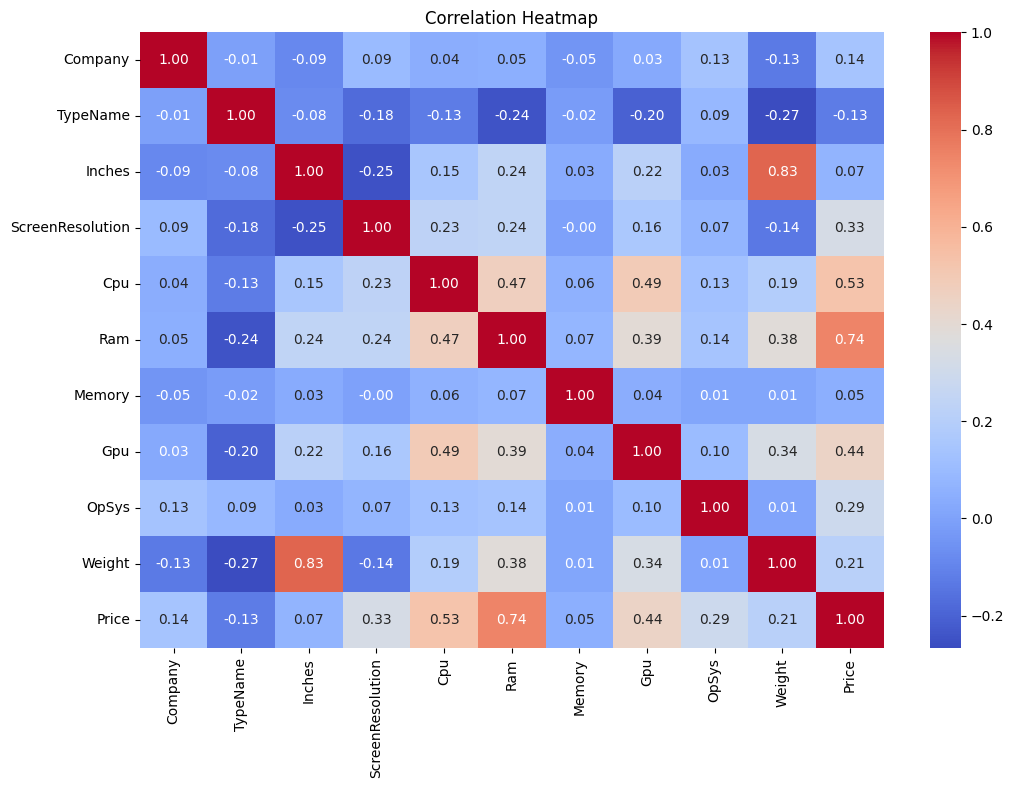

In [19]:
correlation_matrix = data1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


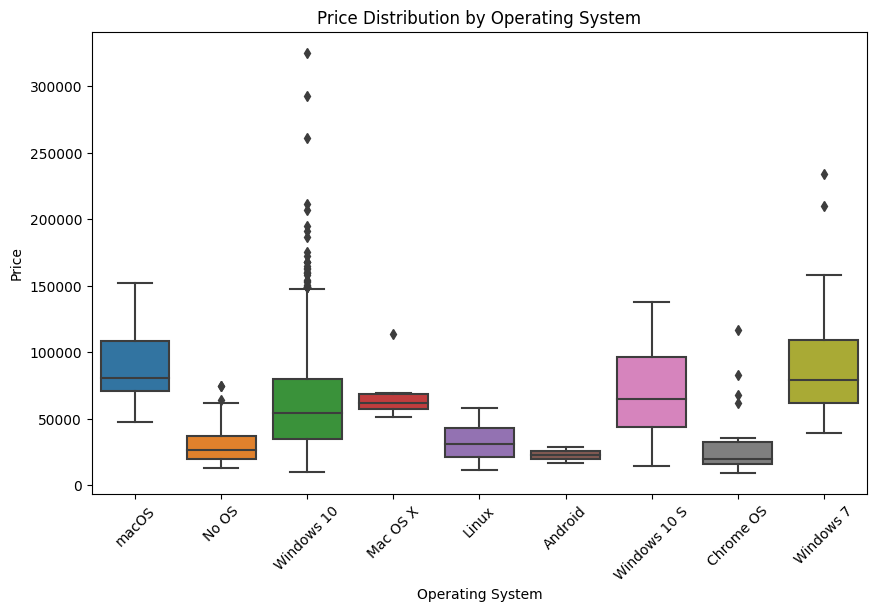

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OpSys', y='Price', data=data)
plt.title("Price Distribution by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()


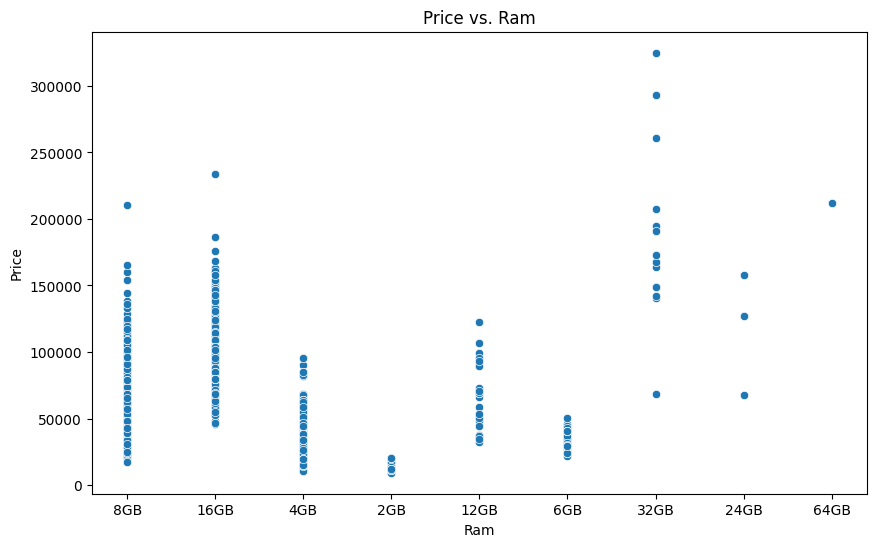

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ram', y='Price', data=data)
plt.title("Price vs. Ram")
plt.xlabel("Ram")
plt.ylabel("Price")
plt.show()


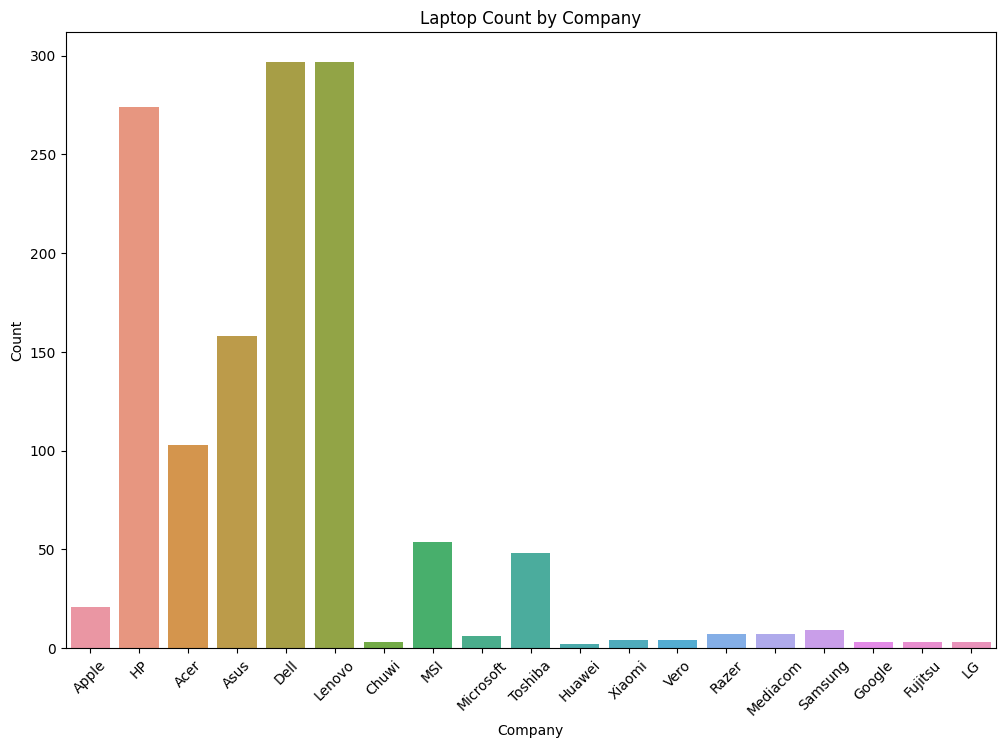

In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Company', data=data)
plt.title("Laptop Count by Company")
plt.xlabel("Company")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


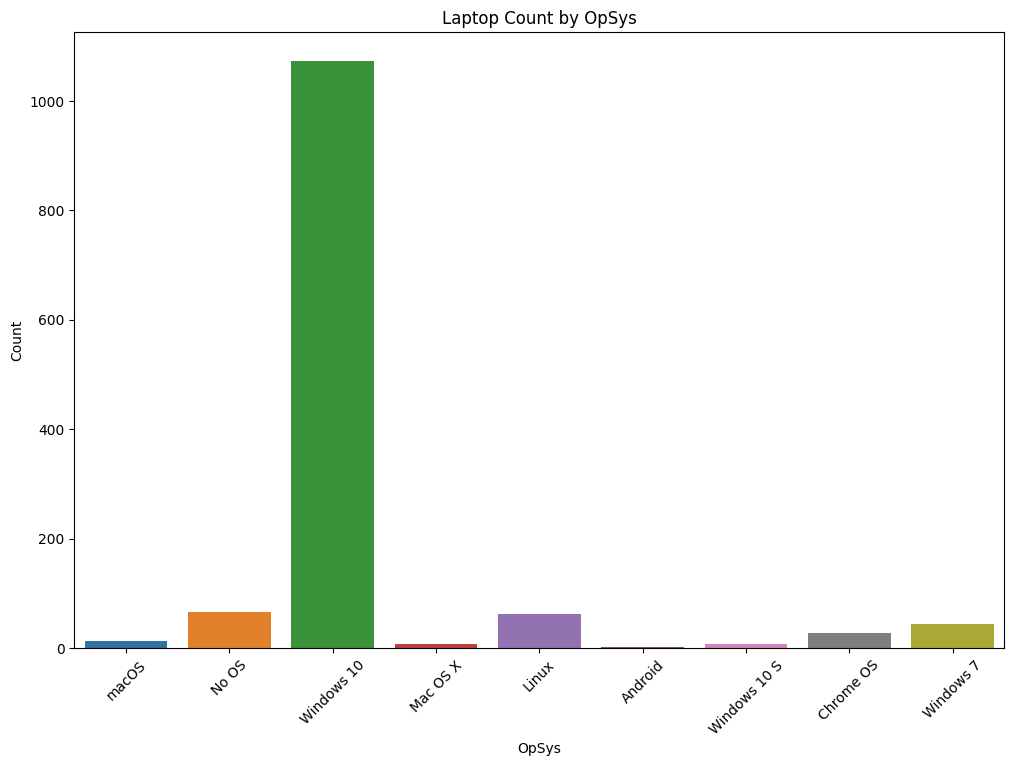

In [23]:
plt.figure(figsize=(12, 8))
sns.countplot(x='OpSys', data=data)
plt.title("Laptop Count by OpSys")
plt.xlabel("OpSys")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

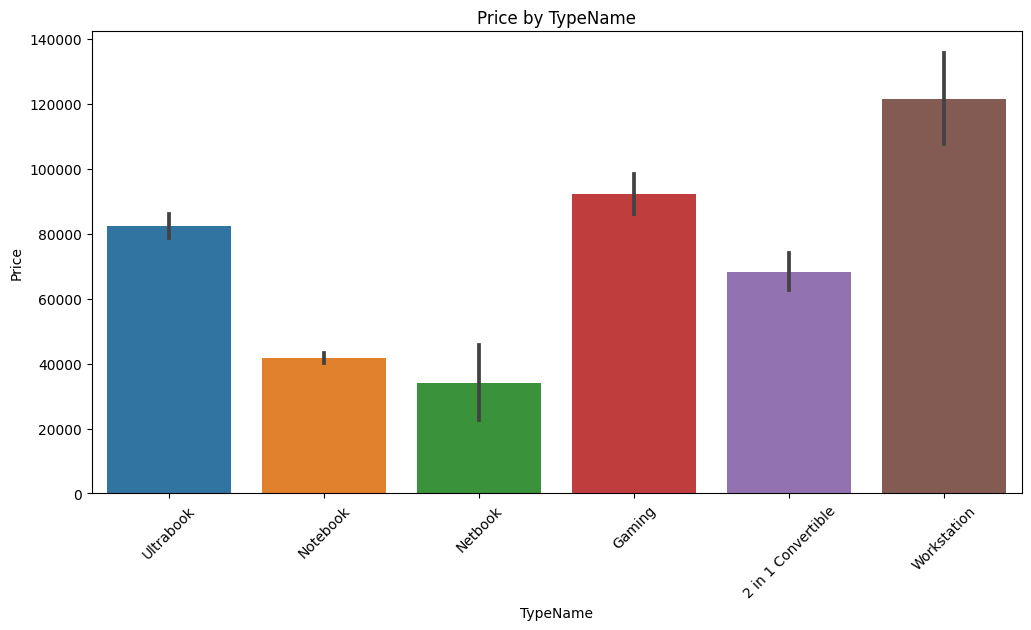

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='TypeName', y='Price', data=data)
plt.title("Price by TypeName")
plt.xlabel("TypeName")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()


In [25]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = data1.drop('Price', axis=1)  
y = data1['Price']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, 
                                                    random_state=45)
lr = LinearRegression()



lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")



Mean Squared Error (MSE): 418351643.07038164
R-squared: 0.7202593486089977
